##### Pymaceuticals Inc.
Analysis
Add your analysis here.
1. the breakdown of male and female is fairly equal with males accounting for 2% more in the population
2. there was only 1 mouse that had multiple readings on timepoints leaving the original data reasonably clean. 
3. there is a strong correlation with weight and tumor volume at 0.83
4. in taking the sample of our 4 drug regimens, it shows in 2 ways that capomulin was most successful in reducing
    the tumor volume over time.
5. There appears to be one outlier in the Infubinol drug and Infubinol and Ceftamin were the least succesful in
    reducing tumor volume. 

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
# Combine the data into a single DataFrame
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
merge_df["Mouse ID"].nunique()

249

In [ ]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate = merge_df[merge_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_id = duplicates["Mouse ID"].unique()
duplicate_id

In [6]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_data = merge_df[merge_df["Mouse ID"] == "g989"]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.drop(merge_df[merge_df["Mouse ID"] == "g989"].index)
clean_df.head()   

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

#### Summary Statistics¶

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
group_df = clean_df.groupby("Drug Regimen")

mean = group_df["Tumor Volume (mm3)"].mean()
median = group_df["Tumor Volume (mm3)"].median()
variance = group_df["Tumor Volume (mm3)"].var()
std_dev = group_df["Tumor Volume (mm3)"].std()
sem = group_df["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
group_df = clean_df.groupby("Drug Regimen")
summary_stats = pd.DataFrame({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": median,
    "Tumor Volume Variance": variance,
    "Tumer Volume Std. Dev.": std_dev,
    "Tumor Volume Std. Err.": sem
})

# Assemble the resulting series into a single summary DataFrame.
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumer Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# https://pandas.pydata.org/docs/reference/api/pandas.MultiIndex.from_product.html
# https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.agg.html#pandas.core.groupby.DataFrameGroupBy.agg

aggregated_stats = group_df["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
group_df = clean_df.groupby("Drug Regimen")
aggregated_stats.columns = pd.MultiIndex.from_product([["Tumor Volume (mm3)"], aggregated_stats.columns])

# Using the aggregation method, produce the same summary statistics in a single line
aggregated_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

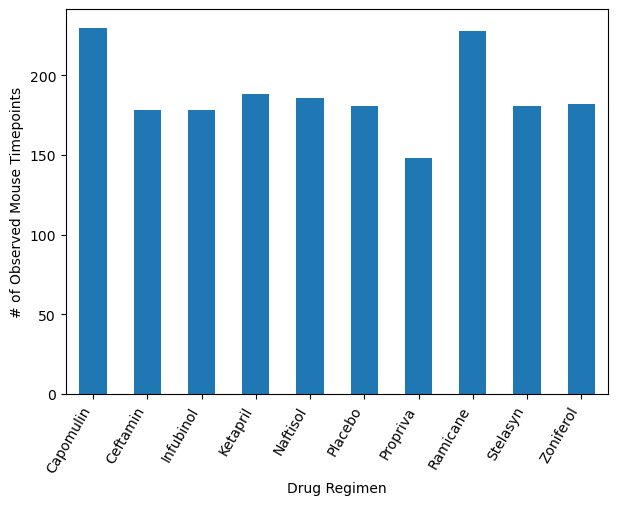

In [12]:
# Use pandas to create a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen.
# DataFrame.plot() see data visualization 5, night 2 for pandas graphing
counts = clean_df.groupby("Drug Regimen").size()

ax = counts.plot(kind="bar", figsize=(7,5))
ax.set_xticklabels(counts.index, rotation=60, ha="right")

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

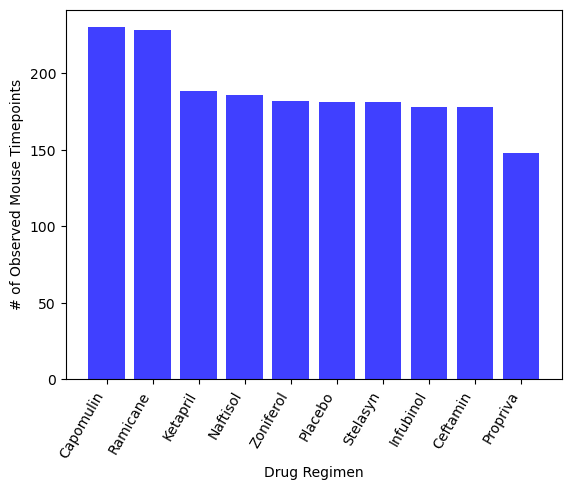

In [13]:
# Use pyplot to make a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen.
# Utilize data visualization 5, night 1, activities 1-9 for pyplot.
counts = clean_df["Drug Regimen"].value_counts()
x_axis = np.arange(len(counts))
y_axis = counts.values
plt.bar(x_axis, y_axis, color="blue", alpha=0.75, align="center")
# Add labels
plt.xticks(x_axis, counts.index, rotation=60, ha="right")
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Display the chart
plt.show()

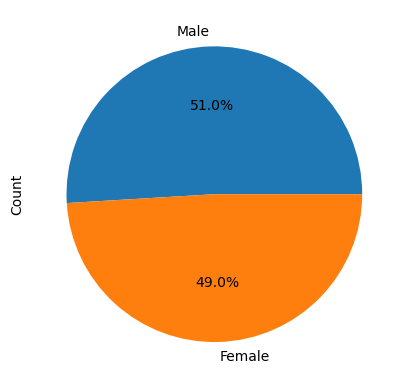

In [14]:
# Create a pie chart using Pandas, DataFrame.plot() to show the distribution of unique male vs female mice.
# DataFrame.plot() see data visualization 5, night 2 for pandas graphing
# Get the unique mice with their gender
sex_counts = clean_df["Sex"].value_counts()

# Make the pie chart
ax = sex_counts.plot(kind="pie", autopct="%1.1f%%")
ax.set_ylabel("Count")
plt.show()

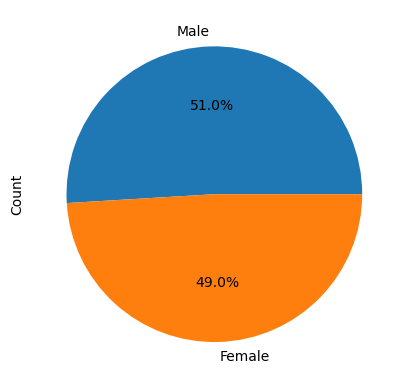

In [15]:
# Create pyplot pie chart to show the distribution of unique male vs female mice.
# Utilize data visualization 5, night 1, activities 1-9 for pyplot.
# Get the unique mice with their gender
sex_counts = clean_df['Sex'].value_counts()
labels = sex_counts.index
sizes = sex_counts.values

# Make the pie chart
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=0)
plt.ylabel("Count")
plt.show()

### Quartiles, Outliers, Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_choices = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
data_choice = clean_df[clean_df["Drug Regimen"].isin(drug_choices)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = data_choice.groupby(["Drug Regimen", "Mouse ID"])["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tumor_volume = pd.merge(last_timepoint, data_choice, on=["Drug Regimen", "Mouse ID", "Timepoint"], how="left")                                                                          


last_tumor_volume

,Drug Regimen,Mouse ID,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,Capomulin,b128,45,Female,9,22,38.982878,2
1,Capomulin,b742,45,Male,7,21,38.939633,0
2,Capomulin,f966,20,Male,16,17,30.485985,0
3,Capomulin,g288,45,Male,3,19,37.074024,1
4,Capomulin,g316,45,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
95,Ramicane,s508,45,Male,1,17,30.276232,0
96,Ramicane,u196,45,Male,18,25,40.667713,3
97,Ramicane,w678,5,Female,5,24,43.166373,0
98,Ramicane,y449,15,Male,19,24,44.183451,0


In [20]:
# Find the outliers using upper and lower bounds 
# Utilize data visualization, night 3 activities 1 - 4 for outliers and quartile formatting
# Make a box plot showing the distribution of the tumor volume for each treatment group (drug_choices = treatments)

# Create a loop and put treatments through it which will become our boxplot drug regimens.
drug_choices = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treatments = drug_choices

# Start with a list for tumor volume data
tumor_volumes ={treatment: [] for treatment in treatments}

for treatment in treatments:
    treatment_data = last_tumor_volume[last_tumor_volume["Drug Regimen"] == treatment]["Tumor Volume (mm3)"].tolist()
    tumor_volumes[treatment] = treatment_data

# Calculate the quartiles with the IQR, determine if there are any possible outliers
# see class activities night 3 for 2-3.
def calculate_iqr(data):
    data_series = pd.Series(data)
    quartiles = data_series.quantile([.25, .50, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    outliers = data_series.loc[(data_series < lower_bound) | (data_series > upper_bound)]
    return lowerq, upperq, lower_bound, upper_bound, iqr, outliers

for treatment in treatments:
    lowerq, upperq, lower_bound, upper_bound, iqr, outliers = calculate_iqr(tumor_volumes[treatment])
    print(f"{treatment} - Lower Quartile: {lowerq}, Upper Quartile: {upperq}")
    print(f"{treatment} IQR: {iqr}")
    print(f"{treatment} - Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    print(f"{treatment} potential outliers: {outliers.tolist()}")

Capomulin - Lower Quartile: 32.37735684, Upper Quartile: 40.1592203
Capomulin IQR: 7.781863460000004
Capomulin - Lower Bound: 20.70456164999999, Upper Bound: 51.83201549
Capomulin potential outliers: []
Ramicane - Lower Quartile: 31.56046955, Upper Quartile: 40.65900627
Ramicane IQR: 9.098536719999998
Ramicane - Lower Bound: 17.912664470000003, Upper Bound: 54.30681135
Ramicane potential outliers: []
Infubinol - Lower Quartile: 54.04860769, Upper Quartile: 65.52574285
Infubinol IQR: 11.477135160000003
Infubinol - Lower Bound: 36.83290494999999, Upper Bound: 82.74144559000001
Infubinol potential outliers: [36.3213458]
Ceftamin - Lower Quartile: 48.72207785, Upper Quartile: 64.29983003
Ceftamin IQR: 15.577752179999997
Ceftamin - Lower Bound: 25.355449580000002, Upper Bound: 87.66645829999999
Ceftamin potential outliers: []


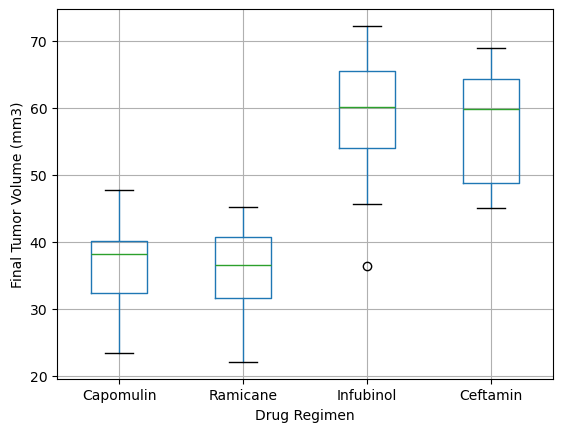

In [21]:
# need to use the lists created to get the IQR, outliers for our 4 drug regimens.
tumor_volumes = pd.DataFrame({k: pd.Series(v) for k, v in tumor_volumes.items()})

fig1, ax1 = plt.subplots()
tumor_volumes.boxplot(ax=ax1) 
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

In [22]:
# Check unique mouse IDs and drug regimens in the DataFrame
print(clean_df["Mouse ID"].unique())
print(clean_df["Drug Regimen"].unique())

['k403' 's185' 'x401' 'm601' 'g791' 's508' 'f966' 'm546' 'z578' 'j913'
 'u364' 'n364' 'y793' 'r554' 'm957' 'c758' 't565' 'a644' 'i177' 'j989'
 'i738' 'a520' 'w914' 'r811' 'g288' 'i334' 'q610' 'd251' 'l897' 'c458'
 'b742' 'b128' 'j246' 'a411' 'j119' 'w150' 'v923' 'g316' 's710' 'l509'
 'r944' 'e662' 'u196' 'q597' 'a444' 'i557' 'r921' 'w678' 'y449' 'a203'
 'a251' 'a262' 'a275' 'a366' 'a401' 'a457' 'a492' 'a577' 'a685' 'a699'
 'a788' 'a818' 'a897' 'a963' 'b313' 'b447' 'b487' 'b559' 'b759' 'b879'
 'c139' 'c264' 'c282' 'c302' 'c326' 'c402' 'c559' 'c580' 'c757' 'c766'
 'c819' 'c832' 'c895' 'c927' 'd133' 'd164' 'd474' 'e213' 'e227' 'e291'
 'e476' 'e584' 'f129' 'f234' 'f278' 'f345' 'f394' 'f436' 'f545' 'f932'
 'f993' 'g107' 'g296' 'g497' 'g558' 'g570' 'g867' 'h246' 'h333' 'h428'
 'h531' 'i386' 'i477' 'i635' 'i669' 'i901' 'j235' 'j296' 'j365' 'j755'
 'j984' 'k210' 'k382' 'k483' 'k510' 'k603' 'k754' 'k804' 'k862' 'k894'
 'l215' 'l264' 'l471' 'l490' 'l558' 'l661' 'l700' 'l725' 'l733' 'l872'
 'm133

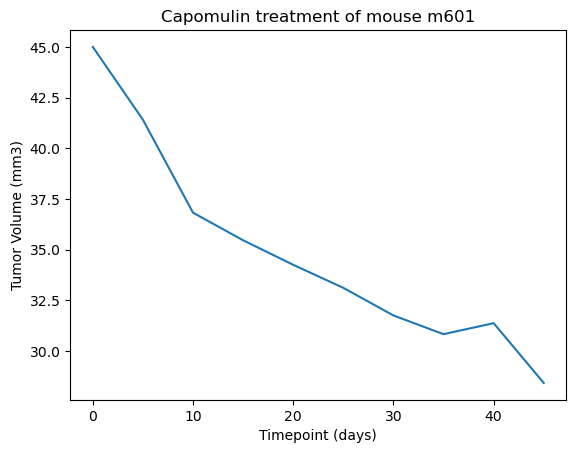

In [23]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# utilize data visualization, night 2 activities for line, scatter plots
mouse_id = "m601"
capomulin_data = clean_df[(clean_df["Drug Regimen"] == "Capomulin") & (clean_df["Mouse ID"] == mouse_id)]
capomulin_data.plot(x="Timepoint", y="Tumor Volume (mm3)", kind="line", legend=False)

# list title and x, y labels
plt.title("Capomulin treatment of mouse m601")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

# Show the plot
plt.show()

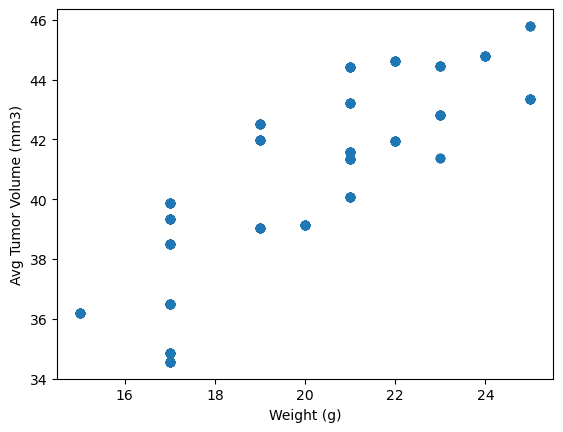

In [24]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Set paramaters from our specific drug being looked at
capomulin_data = clean_df[clean_df["Drug Regimen"] == "Capomulin"]

# Recreate the mean tumor volumes.
mean_tumor = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().reset_index()
mean_tumor.columns = ["Mouse ID", "Mean Tumor Volume (mm3)"]

# Merge the dataFrames
merged_data = pd.merge(mean_tumor, clean_df[["Mouse ID", "Weight (g)"]], on="Mouse ID")

#create the scatter plot
plt.scatter(merged_data["Weight (g)"], merged_data["Mean Tumor Volume (mm3)"])

# set the axis and show plot
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()

# Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.83


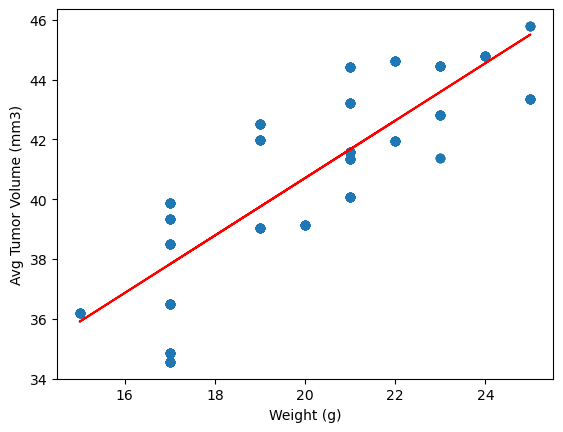

In [25]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# use Data Visualization 5, night 3, activities 6 and 8, imported linregress
correlation = st.pearsonr(merged_data["Weight (g)"], merged_data["Mean Tumor Volume (mm3)"])
slope, intercept, r_value, p_value, std_err = st.linregress(merged_data["Weight (g)"], merged_data["Mean Tumor Volume (mm3)"])
regression_line = slope * merged_data["Weight (g)"] + intercept

# Copy scatter plot data from prev cell & add the liner plot and print out the correlation coefficient
plt.scatter(merged_data["Weight (g)"], merged_data["Mean Tumor Volume (mm3)"])
plt.plot(merged_data["Weight (g)"], regression_line, color="red")
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()